1. 구글 뉴스 RSS에 접속하여 뉴스 제목, 뉴스 요약 가져오기

In [1]:
import requests                         # 웹 페이지의 HTML을 가져오는 모듈
import re                               # 정규표현식을 사용하기 위한 모듈
import xml.etree.ElementTree as ET      # XML 데이터를 파싱하는 모듈

from konlpy.tag import Okt
okt = Okt()
from collections import Counter

In [2]:
url = 'https://news.google.com/rss?hl=ko&gl=KR&ceid=KR:ko' 

headers = {
        'User-Agent': 'Mozilla/5.0',
        'Content-Type': 'text/html; charset=utf-8'
        }

response = requests.get(url, headers=headers)

root_element = ET.fromstring(response.text)
iter_element = root_element.iter(tag="item")        # item 태그를 찾아서 반복

In [3]:
title_list = []
description_list = []
for element in iter_element:
    title_list.append(element.find("title").text)           # title 태그에서 텍스트 추출

    # 한글과 띄어쓰기를 제외한 모든 글자를 제거
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')                  # 한글과 띄어쓰기를 제외한 모든 글자
    description = element.find("description").text          # description 태그에서 텍스트 추출
    description_list.append(hangul.sub("",description))     
    #description_list.append(description)     

# 뉴스제목과 뉴스요약을 3개만 가져와 출력
print("뉴스제목: ",title_list[0:3])
print("뉴스요약: ",description_list[0:3])

뉴스제목:  ['‘슈퍼 태풍’에 발묶인 괌 여행객 돌아온다…괌 공항 29일 운영 재개 - 서울신문', '시흥동 데이트폭력 보복살해범 구속영장 발부…"도주 우려" - 뉴스핌', '아시아나, 사고 기종 비상구석 안판다…웃돈 판매 논란 - 연합뉴스TV']
뉴스요약:  ['  슈퍼 태풍에 발묶인 괌 여행객 돌아온다괌 공항 일 운영 재개 서울신문  뉴스쏙 괌 드디어 하늘길 열린다한국인 관광객 드디어 귀국길 매우 강한 태풍 마와르대만 해상서 일본 향할 듯 연합뉴스  연합뉴스   기지도 쑥대밭슈퍼태풍 지나간 괌 위성사진 공개 연합뉴스  태풍 마와르 북동진 경로 좀 더 북쪽으로 수정 오키나와 느리게 관통 매일신문  괌 고립  여행객들 명 고통 계속물음식 부족 뉴스   뉴스에서 전체 콘텐츠 보기', '  시흥동 데이트폭력 보복살해범 구속영장 발부도주 우려 뉴스핌  데이트폭력 신고에 보복금천 살해범 구속영장  연합뉴스  연합뉴스  교제폭력 신고에 보복 살인 대 남성 구속도주 우려 뉴스  법 밖에 놓인 데이트폭력또 참극 이어졌다 한겨레  연인 보복살인 김모씨 노컷뉴스   뉴스에서 전체 콘텐츠 보기', '  아시아나 사고 기종 비상구석 안판다웃돈 판매 논란 연합뉴스  공포의 착륙 중 도와달라 승무원 요청에 비상구 연 대 제압한 의인 한겨레  아시아나에어서울 사고 기종 비상구  좌석 안 판다 종합 한국경제  아시아나 여객기 비상문 연 대 구속  영남  전국  뉴스 한겨레  뛰어내릴 생각이었다 아이들에 죄송비행기 비상문 연 남성 구속 뉴스   뉴스에서 전체 콘텐츠 보기']


2. 형태소를 분석하여 빈도수를 계산

In [4]:
noun_list = []
for title in title_list:
    for noun in okt.nouns(title):
        if len(noun) > 1:
            noun_list.append(noun)
# print("명사: ", noun_list)

for description in description_list:
    for noun in okt.nouns(description):
        if len(noun) > 1:
            noun_list.append(noun)
# print("명사: ", noun_list)

noun_freq_list = Counter(noun_list)
print(noun_freq_list)

Counter({'뉴스': 59, '연합뉴스': 28, '전체': 25, '콘텐츠': 25, '보기': 25, '한국': 16, '서울': 13, '신문': 11, '전국': 10, '일본': 10, '경제': 9, '연예': 9, '연휴': 8, '가능성': 8, '태풍': 7, '태평양': 7, '조선일보': 7, '금쪽': 7, '임영웅': 7, '폭력': 6, '공급망': 6, '위성': 6, '뉴스데스크': 6, '부채': 6, '한도': 6, '합의': 6, '개국': 6, '테슬라': 6, '정숙': 6, '엄정화': 6, '미나': 6, '필립': 6, '유빈': 6, '월드컵': 6, '한겨레': 6, '보복': 5, '중국': 5, '견제': 5, '동아일보': 5, '타결': 5, '도서국': 5, '회담': 5, '안보리': 5, '원희룡': 5, '닥터': 5, '걸환': 5, '은메달': 5, '충격': 5, '역전패': 5, '종합': 5, '방송': 5, '데이트': 4, '아시아나': 4, '비상': 4, '차세대': 4, '마지막': 4, '호우': 4, '내내': 4, '바이든': 4, '매카시': 4, '협상': 4, '잠정': 4, '대통령': 4, '오늘': 4, '정상': 4, '연쇄': 4, '영상': 4, '집값': 4, '폭로': 4, '스타벅스': 4, '최대': 4, '게임메카': 4, '공개': 4, '김병철': 4, '스타': 4, '아이': 4, '폴리스': 4, '현금': 4, '스포츠': 4, '진출': 4, '윌리안': 4, '연속': 4, '변화': 4, '조선': 4, '코메디닷컴': 4, '여행객': 3, '운영': 3, '살해': 3, '구속영장': 3, '도주': 3, '우려': 3, '사고': 3, '경향신문': 3, '윤관석': 3, '봉투': 3, '센터': 3, '소형': 3, '안테나': 3, '신호': 3, '확인': 3, '남산타워': 3, '빗줄기': 3, '최종': 3, '주

3. 워드클라우드 그리기

In [5]:
from wordcloud import WordCloud

wc = WordCloud(font_path="NanumGothic", width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(noun_freq_list)
wc.to_file('뉴스_워드클라우드.png')

4. 마스크 적용하기

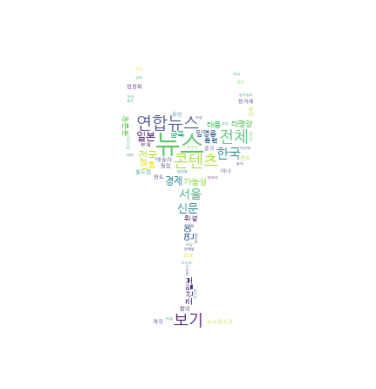

In [14]:
import numpy as np
from PIL import Image # 이미지를 위한 라이브러리
import matplotlib.pyplot as plt # 그래프 및 이미지화 라이브러리

wine_mask = np.array(Image.open('img.jpg'))
wordcloud = WordCloud(font_path="NanumGothic", background_color='white', mask=wine_mask, max_font_size=30).generate_from_frequencies(noun_freq_list)

plt.figure()
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear') 
plt.show()